In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
edadata=pd.read_csv('cleaned_data.csv')

In [3]:
edadata.shape

(38708, 20)

In [4]:
edadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38708 entries, 0 to 38707
Data columns (total 20 columns):
loan_amnt               38708 non-null int64
term                    38708 non-null object
installment             38708 non-null float64
grade                   38708 non-null object
emp_length              38708 non-null object
home_ownership          38708 non-null object
annual_inc              38708 non-null float64
verification_status     38708 non-null object
loan_status             38708 non-null object
purpose                 38708 non-null object
dti                     38708 non-null float64
delinq_2yrs             38708 non-null int64
inq_last_6mths          38708 non-null int64
open_acc                38708 non-null int64
pub_rec                 38708 non-null int64
revol_bal               38708 non-null int64
revol_util              38708 non-null float64
total_acc               38708 non-null int64
pub_rec_bankruptcies    38708 non-null float64
fico_average       

In [5]:
pd.set_option('display.max_columns',150)


edadata.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_average
0,5000,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.7,9,0.0,737.0
1,2500,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0,5,3,0,1687,9.4,4,0.0,742.0
2,2400,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0,2,2,0,2956,98.5,10,0.0,737.0
3,10000,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0,1,10,0,5598,21.0,37,0.0,692.0
4,3000,60 months,67.79,B,1 year,RENT,80000.0,Source Verified,Fully Paid,other,17.94,0,0,15,0,27783,53.9,38,0.0,697.0


In [6]:
edadata.dtypes.value_counts()

object     7
int64      7
float64    6
dtype: int64

# Univariate Analysis

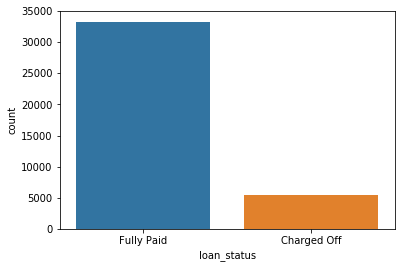

In [7]:
sns.countplot(edadata['loan_status']);

## imbalance labels

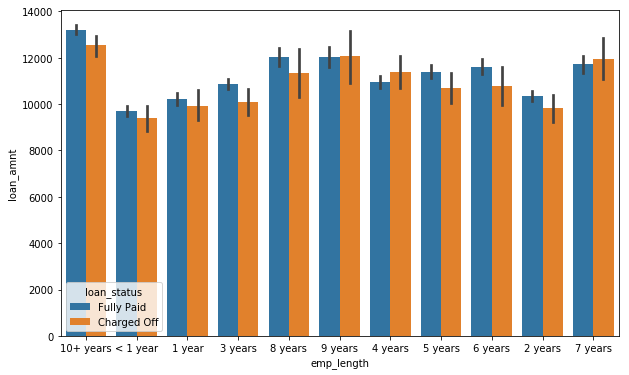

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x='emp_length',y=edadata['loan_amnt'].sort_values(ascending=True),hue='loan_status',data=edadata);

In [9]:
edadata.columns

Index(['loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'fico_average'],
      dtype='object')

In [10]:
tab=pd.crosstab(edadata['grade'],edadata['loan_status'])

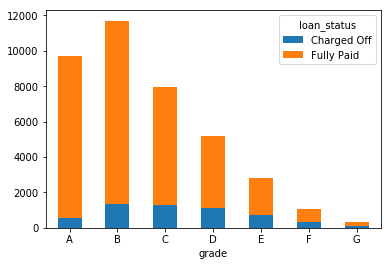

In [11]:
tab.plot.bar(stacked='Bar')
plt.xticks(rotation=0);

### further computation

In [12]:
edadata.groupby('grade')['loan_amnt'].count()

grade
A     9695
B    11699
C     7938
D     5213
E     2811
F     1035
G      317
Name: loan_amnt, dtype: int64

In [13]:
gradeloan=edadata[edadata['loan_status']=='Charged Off'][['grade','loan_amnt']]

In [14]:
gradeloan.groupby('grade')['loan_amnt'].count()

grade
A     558
B    1362
C    1296
D    1097
E     710
F     317
G     100
Name: loan_amnt, dtype: int64

In [15]:
grade_chargedoff=(gradeloan.groupby('grade')['loan_amnt'].count()/edadata.groupby('grade')['loan_amnt'].count())*100

In [16]:
round(grade_chargedoff,2)

grade
A     5.76
B    11.64
C    16.33
D    21.04
E    25.26
F    30.63
G    31.55
Name: loan_amnt, dtype: float64

In [17]:
def univariate(df):
    cols_int = list(df.select_dtypes("int64").columns) # extracting integer columns
    #int_cols = cols_int # copy it in another list which we can alter and this will finally become our int continuous var list
    cols_cat = list(df.select_dtypes(["object","category"]).columns) # cats
    cat_cols = cols_cat  # cats
    cols_float = list(df.select_dtypes("float64").columns) # float
    #float_cols = cols_float  # float
    cont_cols = []
    cats_anomaly = [] # cats which have alot of unique values
    if len(cols_int)>0:
        for i in range(len(cols_int)):
            unique = list(df[cols_int[i]].unique())
            if len(unique)<=11:
                cat_cols.append(cols_int[i])
                # int_cols.remove(cols_int[i])
            else:
                cont_cols.append(cols_int[i])
    if len(cols_float)>0:
        for i in range(len(cols_float)):
            
            if len(list(df[cols_float[i]].unique()))<=11:
                cat_cols.append(cols_float[i])
                #float_cols.remove(cols_float[i])
            else:
                cont_cols.append(cols_float[i])
    if len(cols_cat)>0:
        for i in range(len(cols_cat)):
            if ((len(list(df[cols_cat[i]].unique())))>=15):
                #cat_cols.remove(cols_cat[i])
                cats_anomaly.append(cols_cat[i])
    # Finding the size of figure and matrix
    if len(cat_cols)>0:
        if len(cat_cols)%3==0:
            a = len(cat_cols)//3
        else:
            a = 1 + len(cat_cols)//3
        b = a*5
        # plotting the cat vars
        plt.figure(figsize = (15,b))
        for i in range(len(cat_cols)):
            plt.subplot(a,3,i+1)
            sns.countplot(df[cat_cols[i]].dropna())
    s1 = plt.show()
    # Finding the size of figure and matrix
    if len(cont_cols)>0:
        if len(cont_cols)%3==0:
            a = len(cont_cols)//3
        else:
            a = 1 + len(cont_cols)//3
        b = a*5
        # plotting the cont vars
        plt.figure(figsize = (15,b))
        for i in range(len(cont_cols)):
            plt.subplot(a,3,i+1)
            sns.distplot(df[cont_cols[i]].dropna())
    s2 = plt.show()
    
    return print(cats_anomaly), s1, s2 

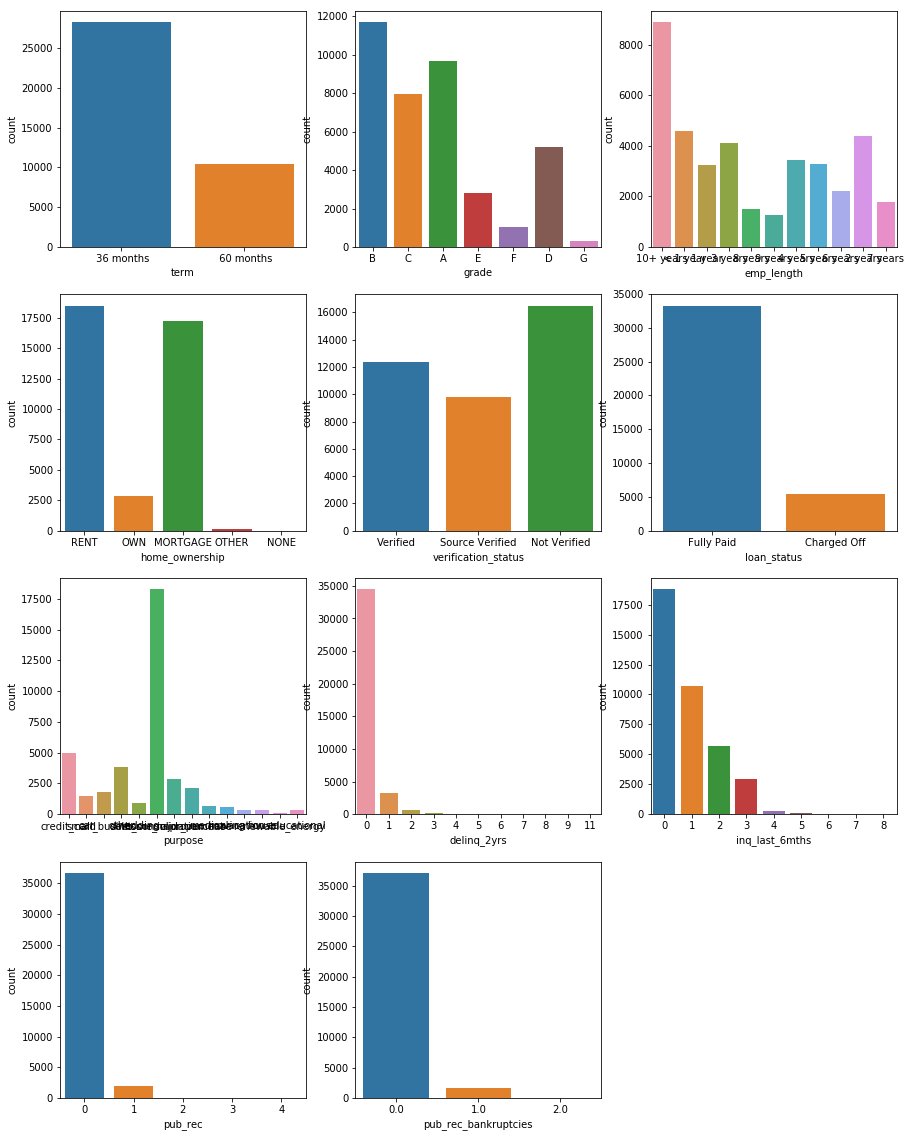

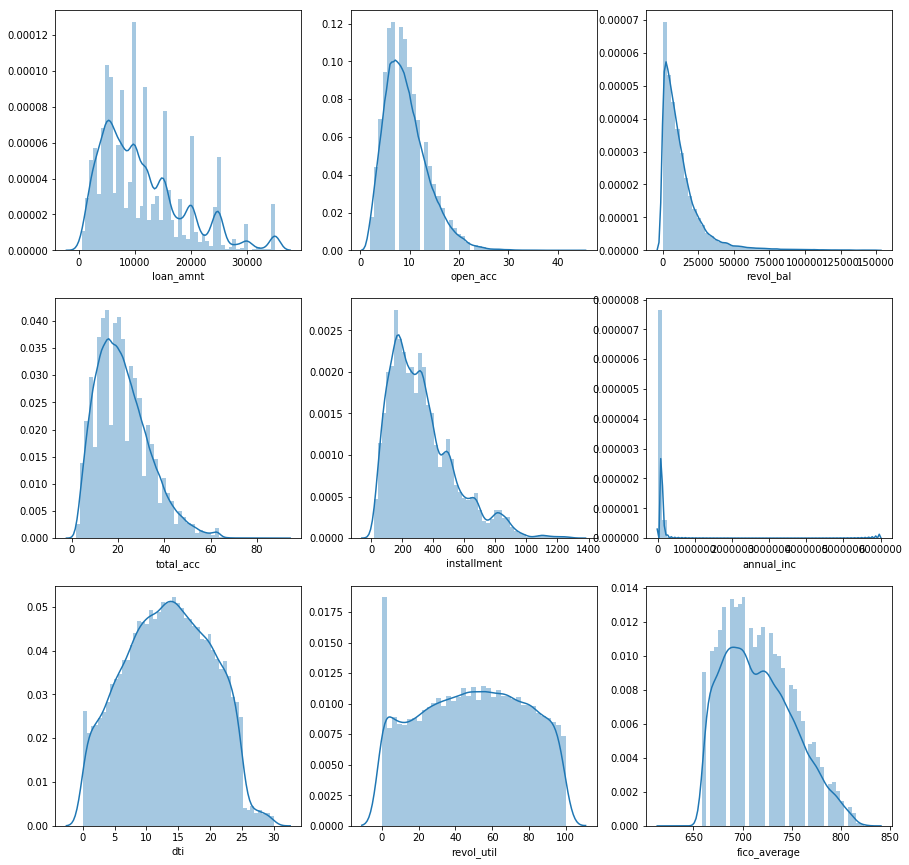

[]


(None, None, None)

In [18]:
univariate(edadata)

In [19]:
# Buvariate analysis with Target variabel whether the customer will churn or not
def bivariate(df, target):
    cols_int = list(df.select_dtypes("int64").columns) # extracting integer columns
    #int_cols = cols_int # copy it in another list which we can alter and this will finally become our int continuous var list
    cols_cat = list(df.select_dtypes(["object","category"]).columns) # cats
    cat_cols = cols_cat  # cats
    cols_float = list(df.select_dtypes("float64").columns) # float
    #float_cols = cols_float  # float
    cont_cols = []
    cats_anomaly = [] # cats which have alot of unique values
    if len(cols_int)>0:
        for i in range(len(cols_int)):
            unique = list(df[cols_int[i]].unique())
            if len(unique)<=11:
                cat_cols.append(cols_int[i])
                # int_cols.remove(cols_int[i])
            else:
                cont_cols.append(cols_int[i])
    if len(cols_float)>0:
        for i in range(len(cols_float)):
            
            if len(list(df[cols_float[i]].unique()))<=11:
                cat_cols.append(cols_float[i])
                #float_cols.remove(cols_float[i])
            else:
                cont_cols.append(cols_float[i])
    if len(cols_cat)>0:
        for i in range(len(cols_cat)):
            if ((len(list(df[cols_cat[i]].unique())))>=15):
                #cat_cols.remove(cols_cat[i])
                cats_anomaly.append(cols_cat[i])
    # Finding the size of figure and matrix
    if len(cat_cols)>0:
        if len(cat_cols)%3==0:
            a = len(cat_cols)//3
        else:
            a = 1 + len(cat_cols)//3
        b = a*5
        # plotting the cat vars
        plt.figure(figsize = (15,b))
        for i in range(len(cat_cols)):
            plt.subplot(a,3,i+1)
            sns.countplot(df[cat_cols[i]].dropna(), hue = df[target])
    s1 = plt.show()
    # Finding the size of figure and matrix
    if len(cont_cols)>0:
        if len(cont_cols)%3==0:
            a = len(cont_cols)//3
        else:
            a = 1 + len(cont_cols)//3
        b = a*5
        # plotting the cont vars
        plt.figure(figsize = (15,b))
        for i in range(len(cont_cols)):
            plt.subplot(a,3,i+1)
            sns.distplot(df[df[target]==df[target].unique()[1]][cont_cols[i]].dropna(), color = 'r')
            sns.distplot(df[df[target]==df[target].unique()[0]][cont_cols[i]].dropna(), color = 'b')
    s2 = plt.show()
    
    return print(cats_anomaly), s1, s2

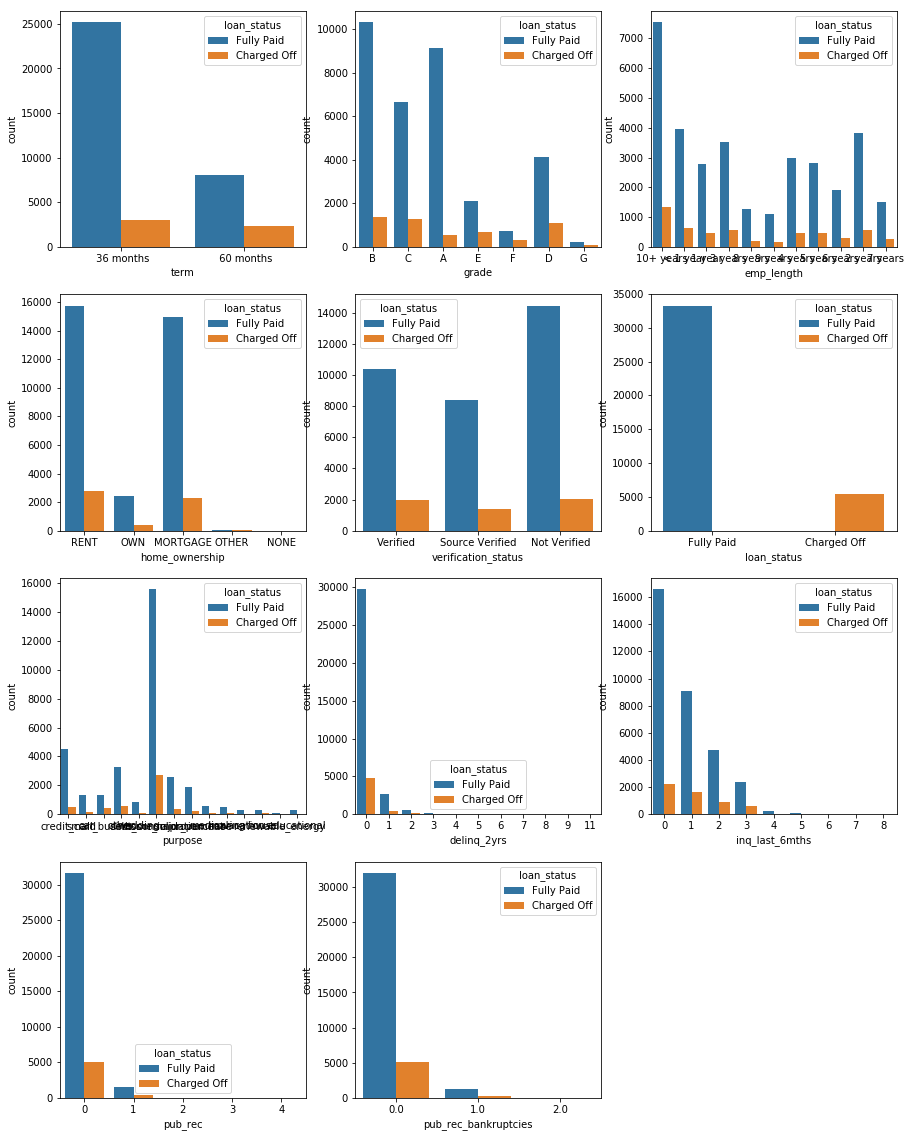

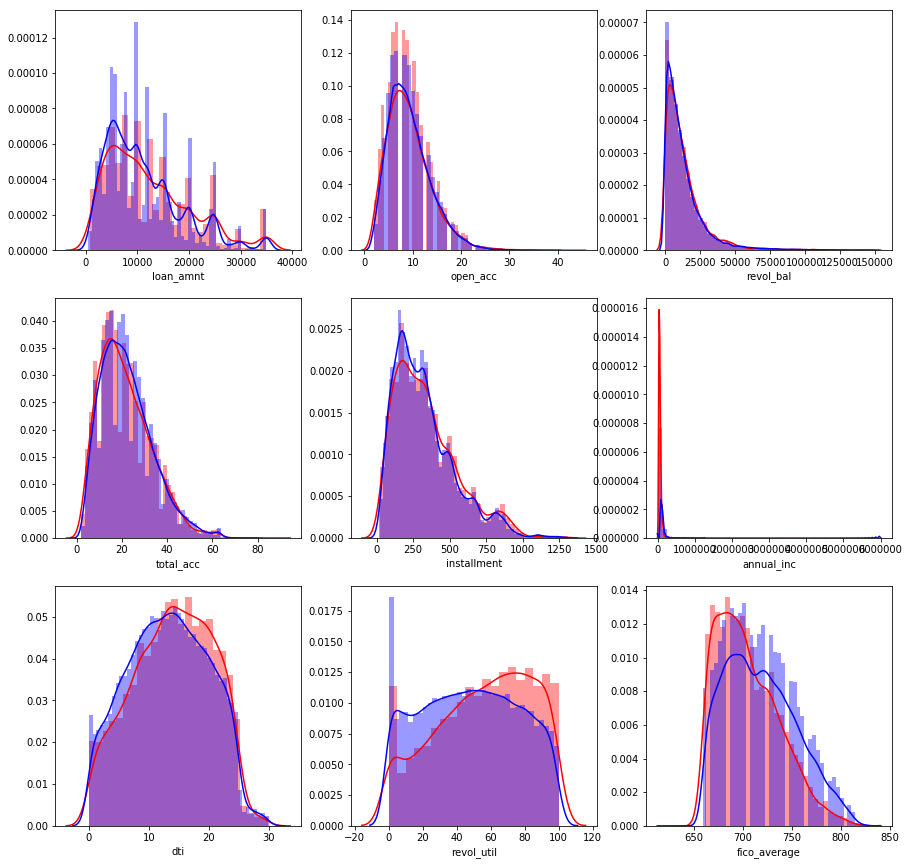

[]


(None, None, None)

In [20]:
bivariate(edadata,'loan_status')

In [ ]:
edadata['purpose'].value_counts()